**Description**: Analyze accuracies for $m = 50, n = 50$ where GPT-2 was pretrained for
2 epochs instead of 1.

**Estimated runtime**: 1 hour 

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join("..", "..")))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 50

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_gpt2_epochs_2")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

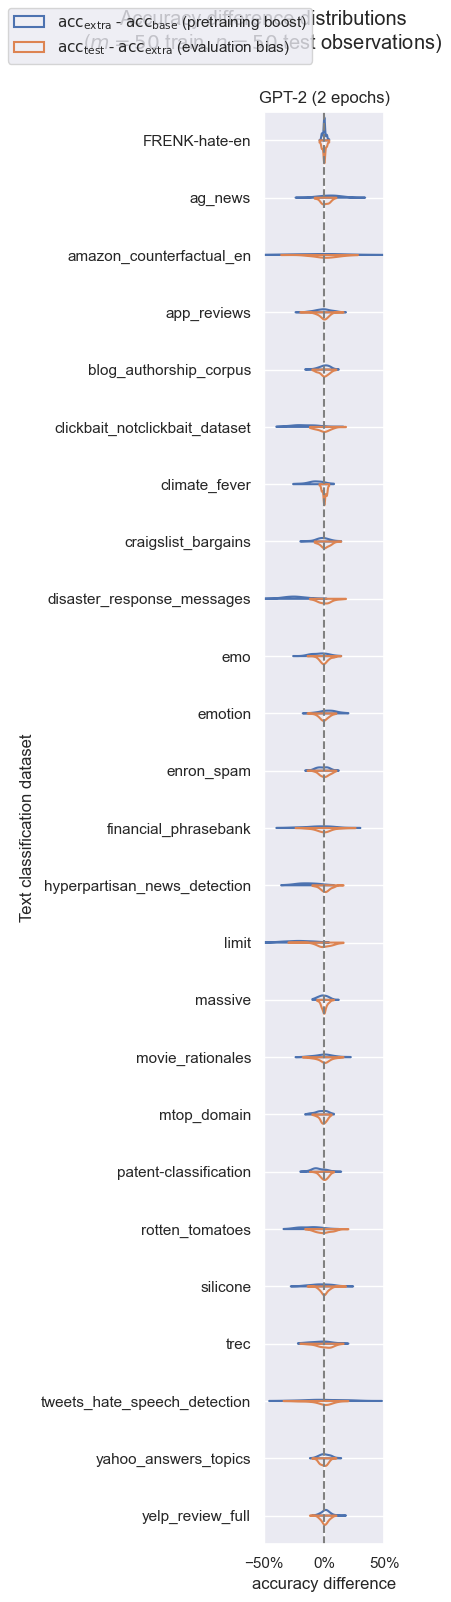

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.047384 ┆ 0.015096 │
└───────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",1.6653e-18,0.001421
"""ag_news""",0.0466,0.009329
"""amazon_counter…",-0.0434,0.021794
"""app_reviews""",-0.0116,0.006853
"""blog_authorshi…",-0.001,0.005072
…,…,…
"""silicone""",-0.0248,0.009476
"""trec""",-0.0338,0.009228
"""tweets_hate_sp…",-5.5511e-18,0.016963
"""yahoo_answers_…",0.005,0.004751


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.000461,0.00309
"""ag_news""",0.210987,0.039551
"""amazon_counter…",0.042699,0.055729
"""app_reviews""",0.011969,0.055062
"""blog_authorshi…",0.004113,0.009788
…,…,…
"""silicone""",-0.032525,0.030901
"""trec""",-0.009246,0.066107
"""tweets_hate_sp…",0.095124,0.045359
"""yahoo_answers_…",0.179298,0.061834


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 797 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],-0.25671,0.00929,-0.27099,-0.24189,0.00013,0.00009,4894.02541,2889.58215,1.00066


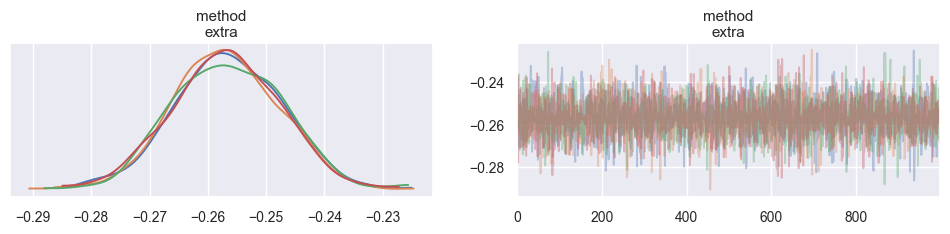

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.001256 ┆ 0.001251 │
└──────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.001,0.001738
"""ag_news""",0.0074,0.00381
"""amazon_counter…",0.0178,0.010154
"""app_reviews""",-0.0044,0.004879
"""blog_authorshi…",-0.0002,0.004134
…,…,…
"""silicone""",0.0036,0.00423
"""trec""",0.0038,0.006785
"""tweets_hate_sp…",-0.0108,0.009266
"""yahoo_answers_…",-0.0054,0.003421


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00085,0.003666
"""ag_news""",0.024355,0.011114
"""amazon_counter…",0.058247,0.023307
"""app_reviews""",inf,NaN
"""blog_authorshi…",0.0022,0.008063
…,…,…
"""silicone""",0.01825,0.013897
"""trec""",0.080027,0.03592
"""tweets_hate_sp…",-0.009674,0.017315
"""yahoo_answers_…",0.036953,0.047202


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1815 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],0.00704,0.00937,-0.00789,0.02206,0.00009,0.00013,10425.28835,2971.74465,1.00231


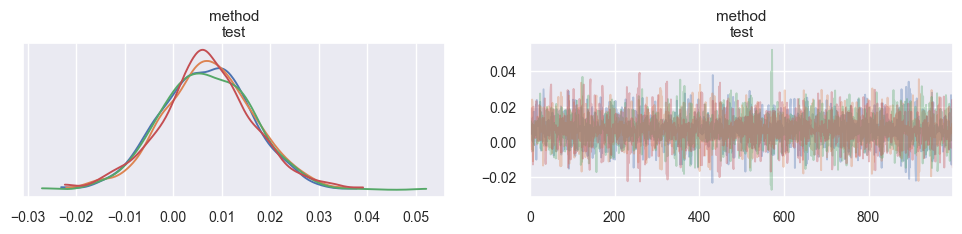

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", "gpt2-epochs-2", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/gpt2-epochs-2/m50/main_m50_n50_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/gpt2-epochs-2/m50/main_m50_n50_treatment.nc'